In [1]:
#I want to go to a Resutrant
#Some where thats close, open and Chinese, Japanese or Greek
#also not too expensive


In [2]:
# (close and open and cheap) and (Greek or Japenese or Chinese)#

In [3]:
from qiskit_aer import qasm_simulator, Aer
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

In [4]:
log_expr = '((chinese & ~japanese & ~greek) | (~chinese & japanese & ~greek) | (~chinese & ~japanese & greek)) & (close & open & cheap)'
oracle = PhaseOracle(log_expr)
problem = AmplificationProblem(oracle)

In [5]:
backend = Aer.get_backend('qasm_simulator')
sampler = Sampler()

C:\Users\Morik\AppData\Local\Temp\ipykernel_8616\1630342758.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [6]:
grover = Grover(sampler=sampler)
result = grover.amplify(problem)

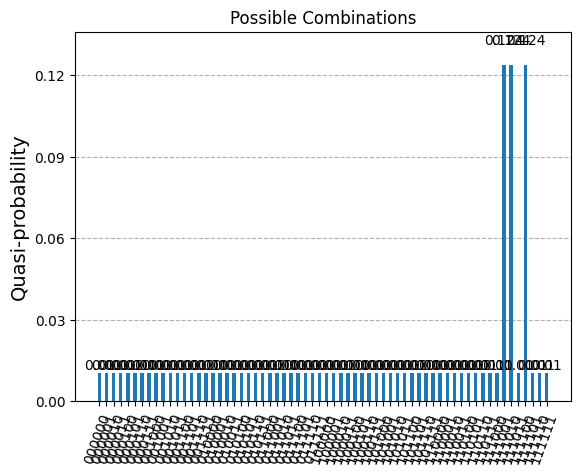

In [7]:
plot_histogram(result.circuit_results, title='Possible Combinations', bar_labels=True)
#From top to bottom, the bits represent the following:
#The strings signify from top to bottom: Chinese, Japanese, Greek, Close, Open, Cheap

In [8]:
print(result.top_measurement) 

111001


In [9]:
top_measurement = result.top_measurement

# Interpret the result
if top_measurement == '111001':
    print("Chinese")
elif top_measurement == '111010':
    print("Japanese")
elif top_measurement == '111100':
    print("Greek")
else:
    print("No suitable restaurant found")

Chinese
